# 해양쓰레기 데이터 EDA 
2019년 해양환경공단_해양쓰레기모니터링 유형별 자료 <br>
https://www.data.go.kr/data/15044008/fileData.do

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# minus 표시
mpl.rcParams['axes.unicode_minus']=False
plt.rc('font',family='NanumBarunGothic')

### 데이터 불러오기

In [4]:
df = pd.read_csv('해양환경공단_해양쓰레기모니터링 유형별 자료 2기방법론_20190910.csv', encoding= 'cp949')
df.head()

,관리번호,년도,지역,차수,분류,재질,상세분류,개수
0,1868,2019,통영 망일봉,1차,플라스틱류,섬유형,"끈(노끈, 포장용끈)",1
1,1868,2019,통영 망일봉,1차,금속,NaN,"캔, 가스캔, 낚시바늘, 낚시추, 스프링 통발, 스프레이캔, 못, 철사, 폭죽 철심 등",1
2,1868,2019,통영 망일봉,1차,목재,NaN,"나무젓가락, 아이스크림 막대, 나무 팔레트, 건축용 목재, 어업용/양식장용 목재, ...",1
3,1868,2019,통영 망일봉,1차,종이,NaN,"종이컵, 우유팩, 종이쇼핑백, 종이상자, 폭죽 종이포장 등",1
4,1868,2019,통영 망일봉,1차,천연 섬유,NaN,"옷, 모자, 양말, 천, 장갑(면장갑, 목장갑, 코팅목장갑) 등 천연 섬유만 해당",1


In [5]:
df.groupby('분류').count()

,관리번호,년도,지역,차수,재질,상세분류,개수
분류,,,,,,,
고무,80,80,80,80,0,80,80
금속,152,152,152,152,0,152,152
기타(+혼합재질),44,44,44,44,0,44,44
목재,138,138,138,138,0,138,138
외국기인,134,134,134,134,134,134,134
유리,132,132,132,132,0,132,132
종이,115,115,115,115,0,115,115
천연 섬유,89,89,89,89,0,89,89
플라스틱류,2485,2485,2485,2485,2485,2485,2485


In [26]:
df_plastic = df.groupby('분류')['개수'].count()
df_plastic = df_plastic.to_frame()

In [27]:
df_p = df_plastic.sort_values(by='개수', ascending=False)
df_p

,개수
분류,
플라스틱류,2485
금속,152
목재,138
외국기인,134
유리,132
종이,115
천연 섬유,89
고무,80
기타(+혼합재질),44


### 데이터 시각화 1 
- 플라스틱 73.8%

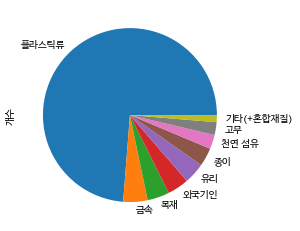

In [30]:
df_p['개수'].plot.pie()

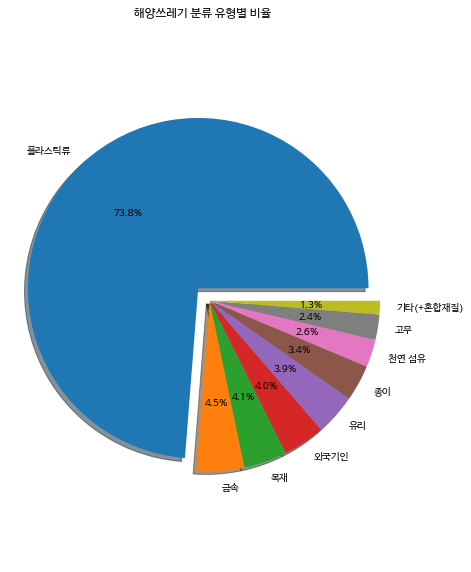

In [40]:
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0]

plt.figure(figsize=(7,10))
plt.pie(df_p['개수'], labels = df_p.index, autopct='%.1f%%', 
        explode = explode, shadow = True)
plt.axis('equal')
plt.title('해양쓰레기 분류 유형별 비율')
plt.show()

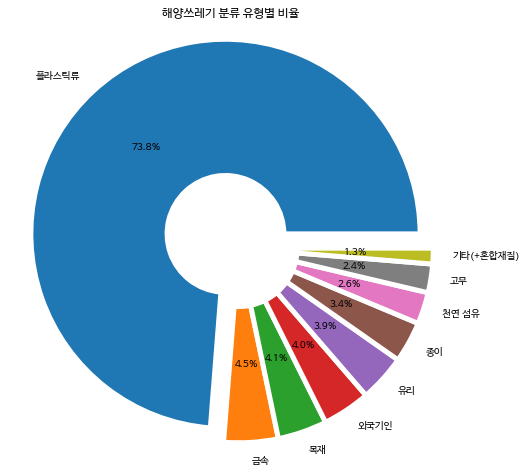

In [41]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.figure(figsize=(8,8))
plt.pie(df_p['개수'], labels = df_p.index, autopct='%.1f%%', 
        explode = explode, wedgeprops= wedgeprops)
plt.axis('equal')
plt.title('해양쓰레기 분류 유형별 비율')
plt.show()

### 워드클라우드 
경질형 플라스틱의 상세분류 

In [43]:
df1 = df[df['분류'] == '플라스틱류']
df1

,관리번호,년도,지역,차수,분류,재질,상세분류,개수
0,1868,2019,통영 망일봉,1차,플라스틱류,섬유형,"끈(노끈, 포장용끈)",1
5,1868,2019,통영 망일봉,1차,플라스틱류,필름형,비닐봉지,6
6,1868,2019,통영 망일봉,1차,플라스틱류,발포형,스티로폼 부표,6
8,1870,2019,신안 임자도,1차,플라스틱류,경질형,"가짜미끼, 형광찌, 낚시 미끼통",1
9,1870,2019,신안 임자도,1차,플라스틱류,필름형,기타(일회용 위생장갑 등),1
...,...,...,...,...,...,...,...,...
3364,2119,2019,신안 고장리해변,6차,플라스틱류,경질형,"음료수병, 각종 뚜껑",2
3365,2119,2019,신안 고장리해변,6차,플라스틱류,경질형,양식용화학약품용기,2
3366,2119,2019,신안 고장리해변,6차,플라스틱류,필름형,"포장지(라면봉지, 과자봉지 등)",2
3367,2119,2019,신안 고장리해변,6차,플라스틱류,경질형,"기타 플라스틱 제품, 상자, 바구니, 방수천막 등",5


In [45]:
df1.groupby('재질').count()

,관리번호,년도,지역,차수,분류,상세분류,개수
재질,,,,,,,
경질형,1104,1104,1104,1104,1104,1104,1104
기타,86,86,86,86,86,86,86
발포형,434,434,434,434,434,434,434
섬유형,511,511,511,511,511,511,511
필름형,350,350,350,350,350,350,350


In [69]:
total_count = df1['상세분류'].value_counts()
total_count

파편                                     350
음료수병, 각종 뚜껑                            196
밧줄(꼬인 것, 어업용)                          177
기타 플라스틱 제품, 상자, 바구니, 방수천막 등            140
비닐봉지                                   136
끈(노끈, 포장용끈)                            123
스티로폼 부표                                114
포장지(라면봉지, 과자봉지 등)                      113
가짜미끼, 형광찌, 낚시 미끼통                      105
1회용품 접시·숟가락·빨대 등                        94
플라스틱 부표                                 86
음식물포장용기(고추장통, 간장병 등)                    71
옷, 천, 장갑, 양말, 이불 등(합성섬유만 해당)            69
스티로폼 식품용기(음식물포장용, 컵라면, 도시락, 과일포장 등)     67
라이터                                     63
세제용기(주방, 세탁, 목욕 등), 화장품                 57
어망                                      53
기타 플라스틱                                 50
파편(노끈, 밧줄, 어망 등으로 구분할 수 없는 경우)          47
기타(스폰지, 물휴지 등)                          47
담배꽁초                                    47
통발, 장어통발용 미끼통                           37
장난감, 인형, 오락용품, 사무용품                     34
기타(일회용 위생장갑

In [49]:
df_det = df1[df1['재질'] == '경질형']['상세분류']
df_det.to_csv('detail.txt')

In [61]:
word_count = df_det.value_counts()
word_count

음료수병, 각종 뚜껑                    196
파편                             144
기타 플라스틱 제품, 상자, 바구니, 방수천막 등    140
가짜미끼, 형광찌, 낚시 미끼통              105
1회용품 접시·숟가락·빨대 등                94
플라스틱 부표                         86
음식물포장용기(고추장통, 간장병 등)            71
라이터                             63
세제용기(주방, 세탁, 목욕 등), 화장품         57
통발, 장어통발용 미끼통                   37
장난감, 인형, 오락용품, 사무용품             34
농약용기, 살충제                       23
포장용 밴드(넙적하고 딱딱한 끈)              19
폭죽/불꽃놀이 용품                      16
양식용화학약품용기                       10
주사기                              9
Name: 상세분류, dtype: int64

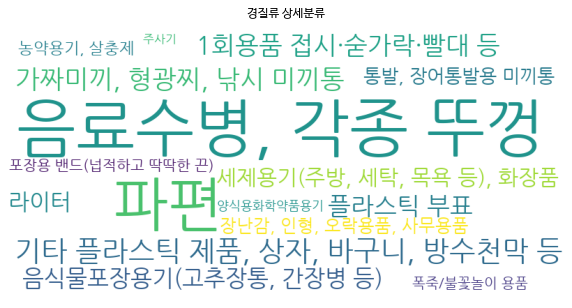

In [71]:
from wordcloud import WordCloud
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(word_count)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('경질류 상세분류')
plt.show()

음료수병에 가장 많이 발견됨 >> 페트병 분석 

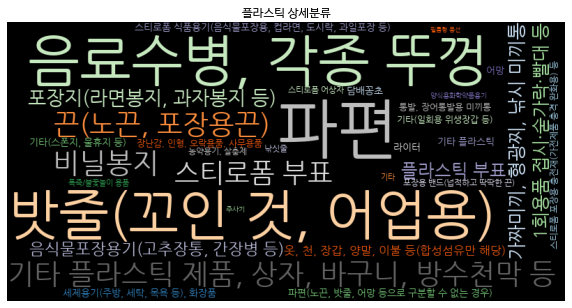

In [79]:
from wordcloud import WordCloud
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='black',
                      colormap='tab20c',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(total_count)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('플라스틱 상세분류')
plt.show()